The dataset used in this notebook is included in the folder of the project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url='https://raw.githubusercontent.com/ShilpaSayuraML/ML-Clustering/main/Mall_Customers.csv'
customers_data = pd.read_csv(url)

In [ ]:
customers_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
customers_data = customers_data.drop('CustomerID', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(customers_data.iloc[:, 0])
print(encoded_sex)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [ ]:
customers_data['Genre'] = encoded_sex

In [ ]:
customers_data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
customers_data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(customers_data)

In [ ]:
reduced_data.shape

(200, 2)

In [ ]:
reduced_data[:5]

array([[-31.86994476, -33.00125207],
       [  0.76449405, -56.84290063],
       [-57.40827565, -13.1249607 ],
       [ -2.16854252, -53.47859   ],
       [-32.17408464, -30.38841187]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=5)

Let's creat table for each centroid so we can easly visualise data in clusters

In [ ]:
cluster = km.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


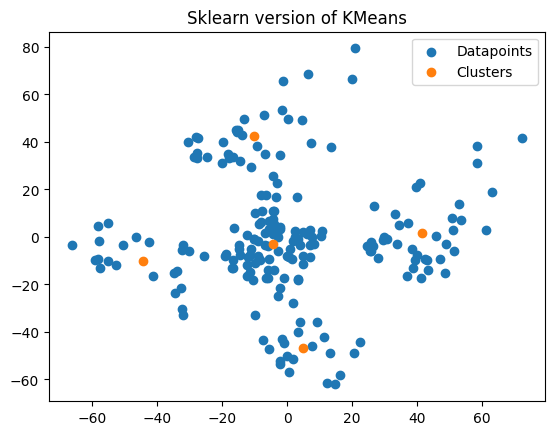

In [ ]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

MeanShift algorithm for clustering

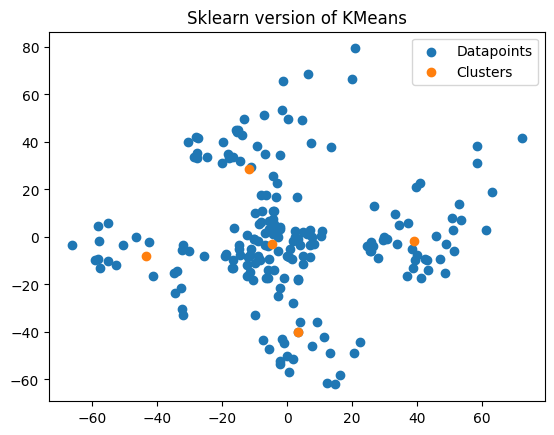

In [ ]:
from sklearn.cluster import MeanShift
mshift = MeanShift(bandwidth=25)
cluster_mean = mshift.fit(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster_mean.cluster_centers_[:, 0], cluster_mean.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

## Analyse clusters

In [ ]:
import numpy as np
import random

class KMeans_numpy(object):
    #INPUT: n_clusters - number of clusters that algortihm will try to find
    #       tolerance -  number when difference between prev cluster and new cluster is less then this number we will stop algo
    #       max_iter - how many times cetroids will move
    def __init__(self, n_clusters=2, tolerance = 0.001, max_iter = 300):
        self.k_clusters = n_clusters
        self.tol = tolerance
        self.max_iter = max_iter

    #TRAIN/FIT function, used to find the best positions for our clusters
    #
    #INPUT: X - fetures of dataset in which we are trying to find clusters
    def fit(self, X):
        #Starting clusters will be random members from X set
        self.centroids = []

        for i in range(self.k_clusters):
            #this index is used to acces random element from input set
            index = random.randint(1, len(X)-1)
            self.centroids.append(X[index])

        for i in range(self.max_iter):
            #storing previous values of centroids
            prev_centroids = self.centroids
            #This will be dict for ploting data later on
            #with it we can find data points which are in the some cluster
            self.clustered_data = {}
            #Centroids values for this iteration
            cen_temp = []

            for centroid in range(len(self.centroids)):
                #creating empty list of elements for current cluster/centroid
                list_of_closer_samples = []

                for k in range(len(X)):
                    helper_list = []
                    for j in range(self.k_clusters):
                        #caluclating euclidian distance between current X value and all centroids in our list
                        helper_list.append(self.euclidian_distance(self.centroids[j], X[k]))

                    #if minimal distance between curent value and centroid that we are currently interested in
                    #store value to the list of examples for that centroid
                    if np.argmin(helper_list) == centroid:
                        list_of_closer_samples.append(X[k])

                #New position of each cluster is calculated by mean of all examples closest to it
                cen_temp.append(np.average(list_of_closer_samples, axis=0))

                self.clustered_data[centroid] = list_of_closer_samples

            #check if it is optimized
            optimized = True
            for c in range(len(self.centroids)):
                original_centroid = prev_centroids[c]
                current_centroid = cen_temp[c]
                #checking if % of change between old position and new position is less then tolerance (0.001 by default)
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
                    self.centroids = cen_temp

            if optimized:
                break
        #return final clusters values [optional, it is only used for graph]
        c = self.centroids
        return c, self.clustered_data

    #euclidian distance between points
    def euclidian_distance(self, centroid, x_current):
        return np.sqrt(np.sum(np.power((centroid - x_current), 2)))

    #INPUT: X_test set - set of data to test our clusters on
    def predict(self, Xtest):
        pred = []
        for i in range(len(Xtest)):
            help_list = []
            for j in range(len(self.centroids)):
                help_list.append(self.euclidian_distance(self.centroids[j], Xtest[i]))
            pred.append(np.argmin(help_list))
        return pred

In [ ]:
full_data_kmeans = KMeans_numpy(n_clusters=5)
centroids, clus_data = full_data_kmeans.fit(customers_data.values)

<ipython-input-32-94ec4f11e73f>:60: RuntimeWarning: divide by zero encountered in divide
  if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:


In [ ]:
cluster_1 = pd.DataFrame(clus_data[0], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_2 = pd.DataFrame(clus_data[1], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_3 = pd.DataFrame(clus_data[2], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_4 = pd.DataFrame(clus_data[3], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_5 = pd.DataFrame(clus_data[4], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

### Cluster ONE data

In [ ]:
cluster_1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,0,20,16,6
2,0,31,17,40
3,0,35,18,6
4,1,64,19,3
5,1,67,19,14
6,0,58,20,15
7,1,37,20,13
8,0,35,21,35
9,1,52,23,29


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_1['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_1.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_1.loc[(cluster_1['Genre'] == 1.0)].shape[0], cluster_1.loc[(cluster_1['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 45.21739130434783
Average annual income (in thousends) for customers in cluster one: 26.304347826086957
Deviation of the mean for annual income (in thousends) for customers in cluster one: 7.720299513274676
In cluster one we have: 23 customers
From those customers we have 9 male and 14 female


### Cluster TWO Customers analysis

In [ ]:
cluster_2

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,35,93,90
1,0,32,97,86
2,0,29,98,88
3,1,30,99,97
4,1,28,101,68
5,0,36,103,85
6,0,32,103,69
7,0,38,113,91
8,0,35,120,79
9,1,32,126,74


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_2['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_2.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_2.loc[(cluster_2['Genre'] == 1.0)].shape[0], cluster_2.loc[(cluster_2['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 32.45454545454545
Average annual income (in thousands) for customers in cluster one: 108.18181818181819
Deviation of the mean for annual income (in thousands) for customers in cluster one: 13.347237928896694
In cluster one we have: 11 customers
From those customers we have 5 male and 6 female


### Cluster THREE Customers analysis

In [ ]:
cluster_3

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,23,70,29
1,1,43,71,35
2,1,59,71,11
3,1,47,71,9
4,0,25,72,34
5,1,20,73,5
6,0,44,73,7
7,1,19,74,10
8,0,57,75,5
9,0,28,76,40


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_3['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_3.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_3.loc[(cluster_3['Genre'] == 1.0)].shape[0], cluster_3.loc[(cluster_3['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 40.39473684210526
Average annual income (in thousands) for customers in cluster one: 87.0
Deviation of the mean for annual income (in thousands) for customers in cluster one: 16.055823668819066
In cluster one we have: 38 customers
From those customers we have 20 male and 18 female


### Cluster FOUR Customers analysis

In [ ]:
cluster_4

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,39,69,91
1,0,31,70,77
2,1,40,71,95
3,1,38,71,75
4,1,39,71,75
5,0,31,72,71
6,0,29,73,88
7,1,32,73,73
8,0,35,74,72
9,1,32,75,93


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_4['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_4.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_4.loc[(cluster_4['Genre'] == 1.0)].shape[0], cluster_4.loc[(cluster_4['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 32.785714285714285
Average annual income (in thousands) for customers in cluster one: 78.03571428571429
Deviation of the mean for annual income (in thousands) for customers in cluster one: 5.900860366185976
In cluster one we have: 28 customers
From those customers we have 13 male and 15 female


### Cluster FIVE Customers analysis

In [ ]:
cluster_5

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,21,15,81
1,0,23,16,77
2,0,22,17,76
3,0,23,18,94
4,0,30,19,72
...,...,...,...,...
95,0,51,67,43
96,0,50,67,57
97,1,27,67,56
98,0,38,67,40


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_5['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_5.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_5.loc[(cluster_5['Genre'] == 1.0)].shape[0], cluster_5.loc[(cluster_5['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 28.416666666666668
Average annual income (in thousands) for customers in cluster one: 62.416666666666664
Deviation of the mean for annual income (in thousands) for customers in cluster one: 9.67923034130297
In cluster one we have: 36 customers
From those customers we have 16 male and 20 female


### Conclusion:

Based on the data from clusters we can see that there are 3 clusters with totally different age of customers. Also it is more usual for older people to have bigger sallary which is as well shown in our results.

As we can see in the cluster 2, people around age 40 have the biggest salary. Based on that the most exclusive items should be directly promoted to people in that age. Younger people, around the age of 25, tend to have lower salaries, but as we can see from Cluster 5 there are people around age 28 whose salary is much bigger (almost double).

Gender to target in this mall is of course: Females. They tend to buy more stuff, so promotions should be directed to them.


## Business side of Customer clustering

So the real question is how can we use this in our business? Based on the information from the clusters we can decide which strategy to run, what our target should be. There is also a posibility  to conduct an survay on the potential new strategy for one or two segments of customers. Based on that feedback we can decide whether the new strategy is good for that customer segment or not, even before the strategy is released.